In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('vgsales.csv')

In [4]:
df = df.dropna(subset=['Year', 'Platform', 'Genre', 'Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales'])
df['Year'] = df['Year'].astype(int)
df.describe()
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


# Bar Graph

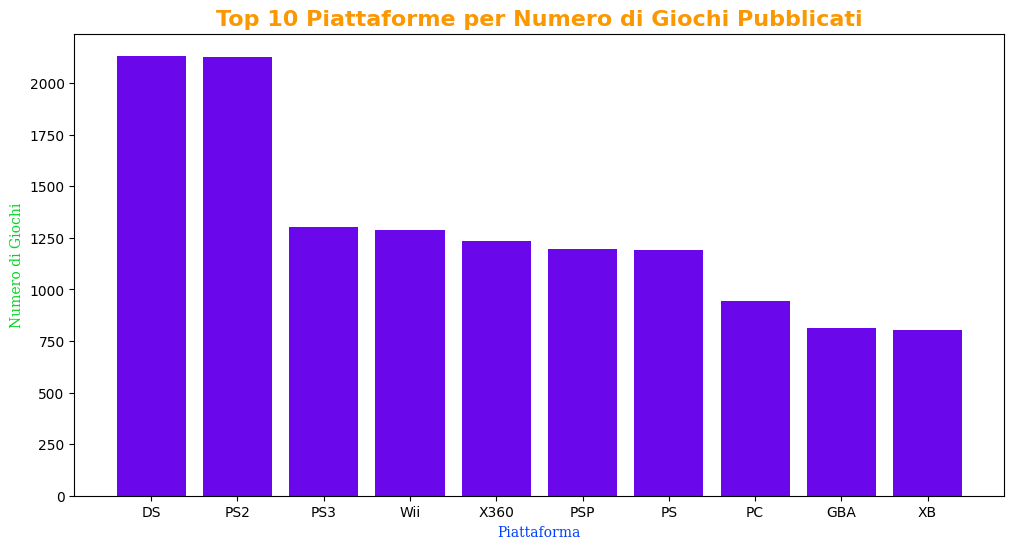

In [18]:

top_10_platforms = df['Platform'].value_counts().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.bar(top_10_platforms.index, top_10_platforms.values, color="#6B08EB")
plt.title('Top 10 Piattaforme per Numero di Giochi Pubblicati',fontsize=16, color ="#FB9700", fontweight='bold')
plt.xlabel('Piattaforma', fontname="serif", color="#0140FC")
plt.ylabel('Numero di Giochi', fontname="serif", color="#03D622")
plt.show()

In [19]:
# 1. Vendite totali per genere
sales_by_genre = df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)

# 2.Vendite totali per piattaforma e selezionae per la top 15
sales_by_platform = df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False).head(15)

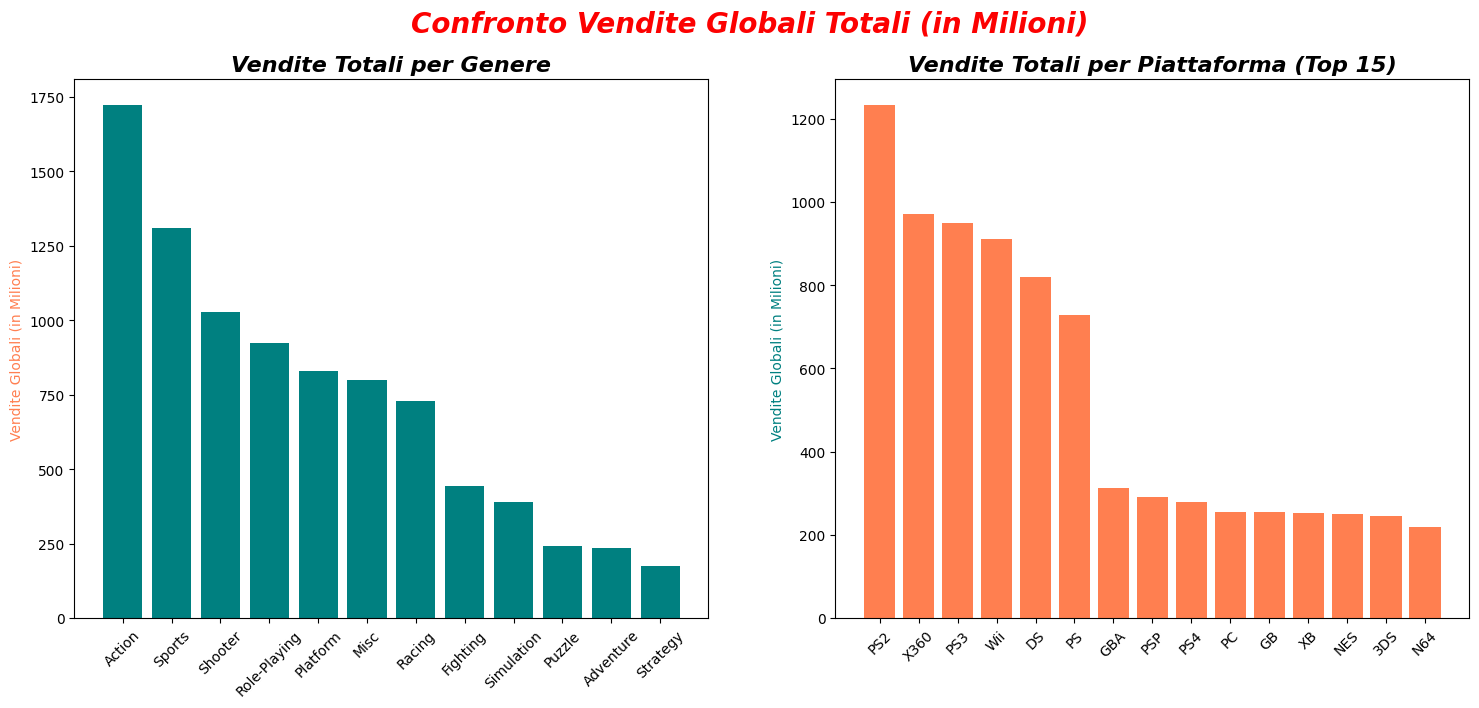

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(18, 7))
fig.suptitle('Confronto Vendite Globali Totali (in Milioni)', fontsize=20, fontweight='bold',fontstyle= 'italic', color="#FC0101")

# Grafico 1: Vendite per Genere
axes[0].bar(sales_by_genre.index, sales_by_genre.values, color='teal')
axes[0].set_title('Vendite Totali per Genere', fontsize=16,fontweight='bold',fontstyle= 'italic')
axes[0].set_ylabel('Vendite Globali (in Milioni)',color='coral')
axes[0].tick_params(axis='x', rotation=45) 

# Grafico 2: Vendite per Piattaforma
axes[1].bar(sales_by_platform.index, sales_by_platform.values, color='coral')
axes[1].set_title('Vendite Totali per Piattaforma (Top 15)', fontsize=16,fontweight='bold',fontstyle= 'italic')
axes[1].set_ylabel('Vendite Globali (in Milioni)',color='teal')
axes[1].tick_params(axis='x', rotation=45)

plt.show()

# Scatter  (Marco)

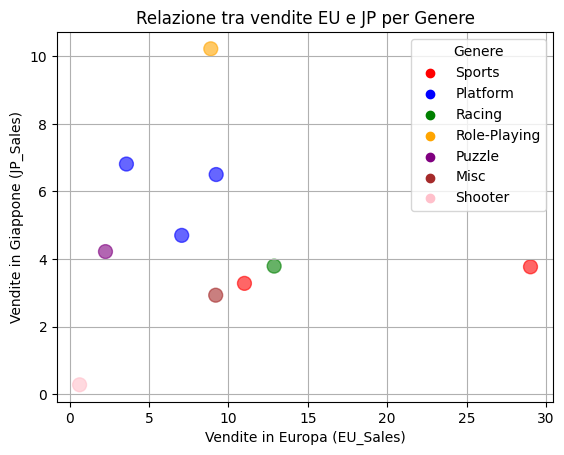

In [21]:
df = df.dropna(subset=["EU_Sales", "JP_Sales", "Genre"])

df = df[:10] #Primi 10 giochi

generi = df["Genre"].unique()
colori = ["red", "blue", "green", "orange", "purple", "brown", "pink", "gray", "cyan", "olive"]
mappa_colori = dict(zip(generi, colori))

x = df["EU_Sales"]
y = df["JP_Sales"]
c = df["Genre"].map(mappa_colori)

plt.scatter(x, y, c=c, s=100, alpha=0.6)

plt.xlabel("Vendite in Europa (EU_Sales)")
plt.ylabel("Vendite in Giappone (JP_Sales)")
plt.title("Relazione tra vendite EU e JP per Genere")

for genere in generi:
    plt.scatter([], [], c=mappa_colori[genere], label=genere)

plt.legend(title="Genere")
plt.grid(True)
plt.show()

# Pie Chart(Carmelo) 

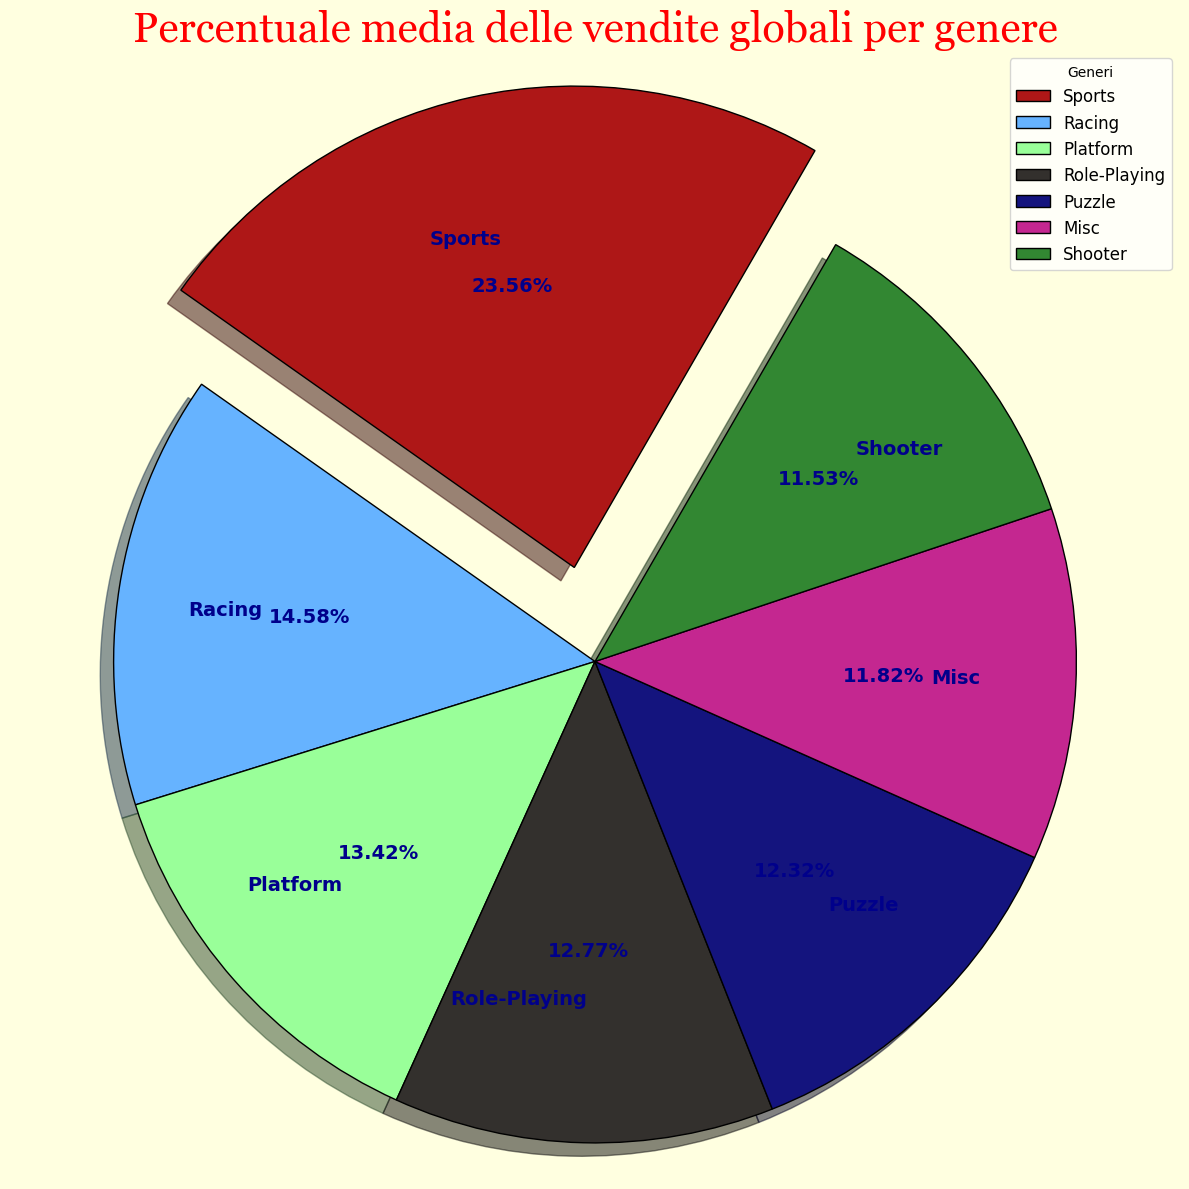

In [22]:
#pulizia colonne numeriche nan
for col in df.select_dtypes(include='number').columns:
    df[col] = df[col].fillna(df[col].median())
#pulizia colonne object nan con fill "Sconosciuto"
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].fillna("Sconosciuto")
df.Global_Sales.describe()
#GROUPBY globalsales per genre
vendite_glb = df.groupby('Genre')['Global_Sales'].mean().sort_values(ascending=False)
#grafico a torta globalsale by genre
colors = ["#ae1717",'#66b3ff','#99ff99',"#33302D", "#14147e", "#c42790", "#328732", "#61E1DA","#a88eae","#E3535A","#C27222", "#e8d31a", "#c476aa", "#328732"]
myExplode = [0.2] + [0] * (len(vendite_glb)-1)
font1 = {'family':'georgia', 'color':'red', 'size':30}
plt.figure(figsize=(12, 12), facecolor='lightyellow')
plt.pie(vendite_glb, labels=vendite_glb.index, labeldistance=0.7, autopct='%1.2f%%', pctdistance=0.6, startangle=60, explode=myExplode, shadow=True,colors=colors, wedgeprops={'edgecolor':'black'}, textprops={'fontsize': 14, 'color': 'darkblue', 'fontweight': 'bold'})
plt.title('Percentuale media delle vendite globali per genere', fontdict=font1)
plt.axis('equal')  # Rende il grafico circolare
plt.tight_layout()
plt.legend(vendite_glb.index, title="Generi", loc="best", fontsize=12)
plt.show()

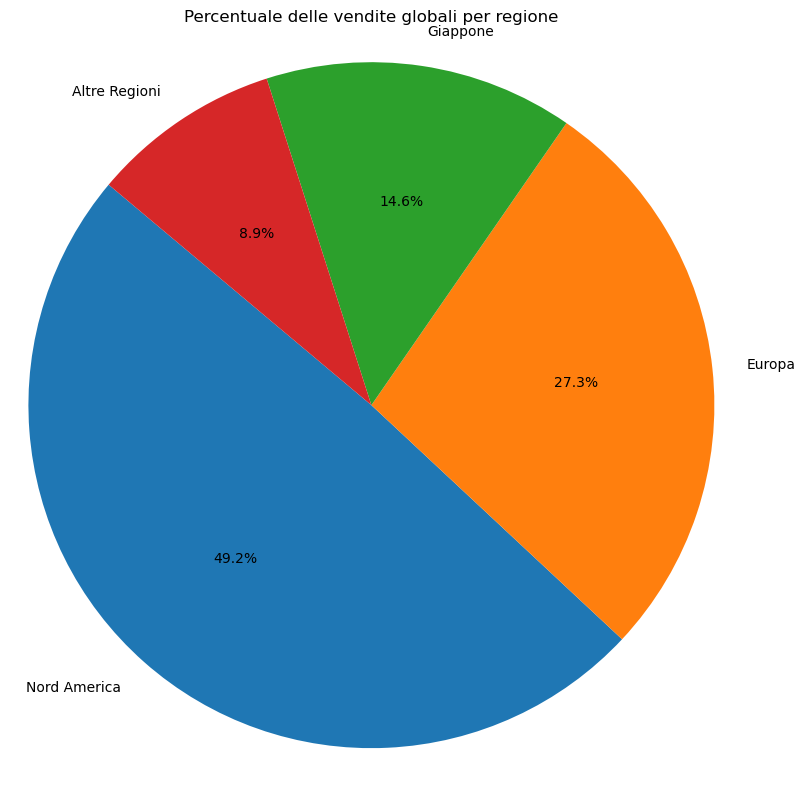

In [9]:
vendite_glb = df.groupby('Genre')['Global_Sales'].mean().sort_values(ascending=False)
vendite_reg= {'Nord America': df['NA_Sales'].sum(),'Europa': df['EU_Sales'].sum(), 'Giappone': df['JP_Sales'].sum(), 'Altre Regioni': df['Other_Sales'].sum()}
etichette=list(vendite_reg.keys())
valori=list(vendite_reg.values())
plt.figure(figsize=(8, 8))
plt.pie(valori, labels=etichette, autopct='%1.1f%%', startangle=140)
plt.title('Percentuale delle vendite globali per regione')
plt.axis('equal')
plt.tight_layout()
plt.show()

# Line (Leonardo)

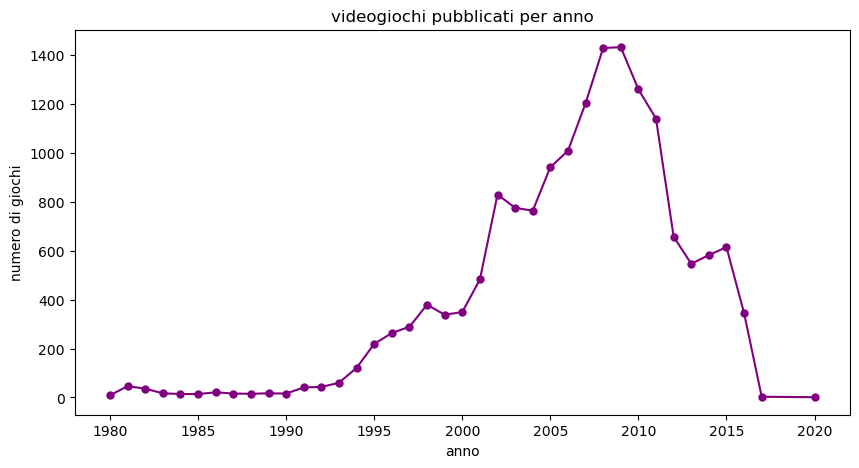

In [5]:
giochi_per_anno = df['Year'].value_counts().sort_index()
plt.figure(figsize=(10,5))
plt.plot(giochi_per_anno.index, giochi_per_anno.values, marker='o', color= 'purple',ms=5 )
plt.title('videogiochi pubblicati per anno')
plt.xlabel('anno')
plt.ylabel('numero di giochi')
plt.show()

Year
1980    11.38
1981    35.77
1982    28.86
1983    16.79
1984    50.36
Name: Global_Sales, dtype: float64


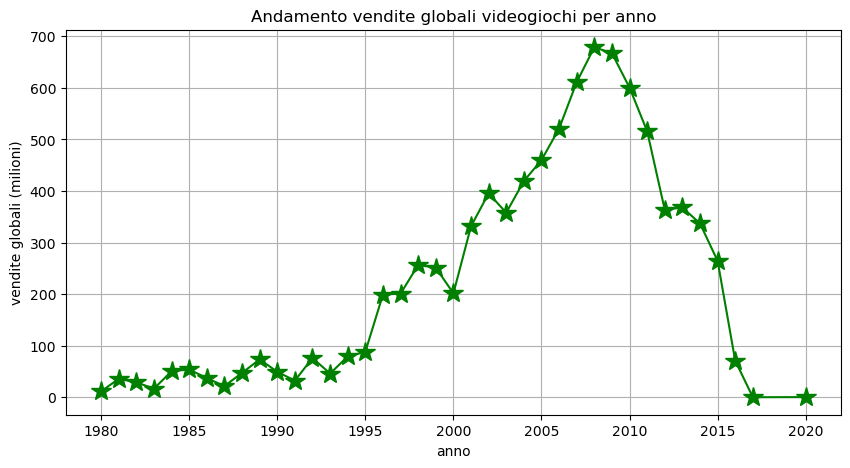

In [6]:
vendite_per_anno = df.groupby('Year')['Global_Sales'].sum()

print(vendite_per_anno.head())

plt.figure(figsize=(10,5))
plt.plot(vendite_per_anno.index, vendite_per_anno.values, marker='*', color='green', ms= 15)
plt.title('Andamento vendite globali videogiochi per anno')
plt.xlabel('anno')
plt.ylabel('vendite globali (milioni)')
plt.grid(True)
plt.show()

# Histogram (Francesco)

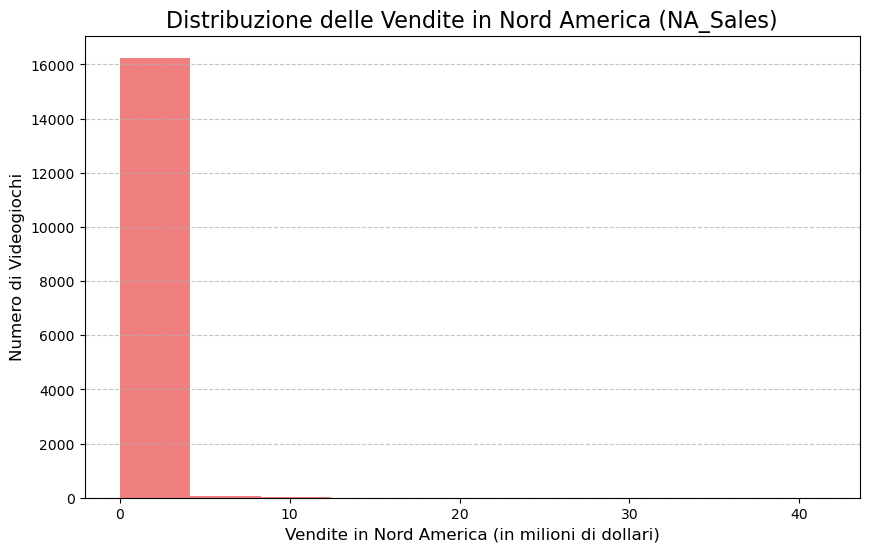

In [7]:
plt.figure(figsize=(10, 6))
plt.hist(df['NA_Sales'], color='lightcoral')
plt.title('Distribuzione delle Vendite in Nord America (NA_Sales)',size=16)
plt.xlabel('Vendite in Nord America (in milioni di dollari)', size=12)
plt.ylabel('Numero di Videogiochi', size=12)
plt.grid(axis='y', alpha=0.75, linestyle='--')
plt.show()

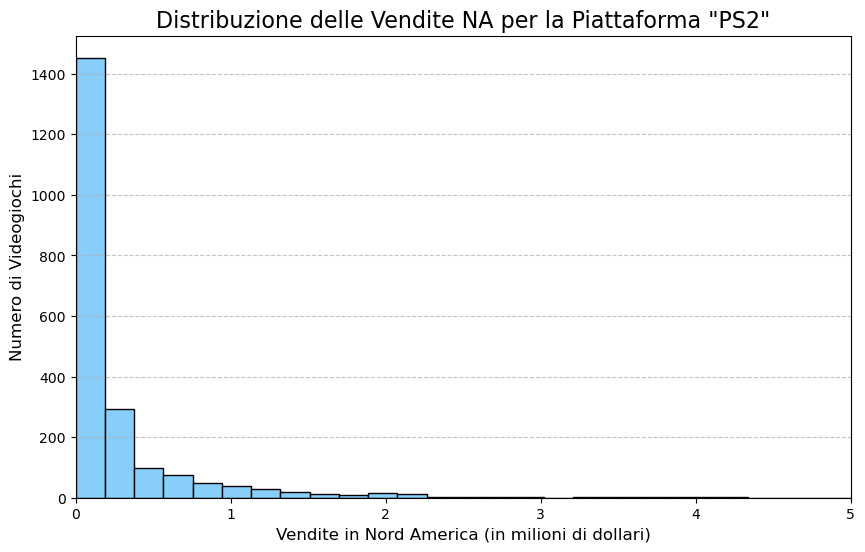

In [8]:
df_ps2_platform = df[df['Platform'] == 'PS2']

plt.figure(figsize=(10, 6))
plt.hist(df_ps2_platform['NA_Sales'], bins=50, color='lightskyblue', edgecolor='black')
plt.title('Distribuzione delle Vendite NA per la Piattaforma "PS2"', size=16)
plt.xlabel('Vendite in Nord America (in milioni di dollari)', size=12)
plt.ylabel('Numero di Videogiochi', size=12)
plt.grid(axis='y', alpha=0.75, linestyle='--')
plt.xlim(0, 5) # Limita l'asse X per focalizzare sui valori più comuni
plt.show()